### The `class` statement

- A **class** defines a set of attributes that are associated with, and shared by, a collection of objects known as **instances**. A class is most commonly a collection of functions (known as **methods**), variables (which are known as **class variables**), and **computed attributes** (which are known as **properties**).

- The values created during the execution of the class body are placed into a class object that serves as a **namespace much like a module**. But there is no class scope.

- It’s important to note that **a `class` statement by itself doesn’t create any instances of the class** - you can think of it as a blueprint for instances to be created.

- The functions defined inside a class are known as **instance methods**.

### Class Instances

- Instances of a class are created by **calling a class object as a function**. This creates a new instance that is then passed to the `__init__()` method of the class. The arguments to `__init__()` consist of the newly created instance `self` along with the arguments supplied when calling the class object.
- The dot (`.`) operator is responsible for **attribute binding**. See below for the rule of attribute access.

### Scoping Rules

- Although classes define a namespace, classes **do not create a scope for names used inside the bodies of methods**. Therefore, when you’re implementing a class, references to attributes and methods must be fully qualified.

- The lack of scoping in classes is **one area where `Python` differs from `C++` or `Java`**: the explicit use of `self` is required because `Python` **does not provide a means to explicitly declare variables** (that is, a declaration such as `int x` or `float y` in `C`). Without this, there is no way to know whether an assignment to a variable in a method is supposed to be a local variable or if it’s supposed to be saved as an instance attribute.

### Inheritance

- **Inheritance** is a mechanism for creating a new class that acquires the properties and methods of another. 
    - The original class is called a **base class** or a **superclass**. The new class is called a **derived class** or a **subclass**.
    - It is possible to **override, i.e. specializes or modifies the behavior of an existing class**. To do that, simply re-declare the function. For `python`, only the method name matters in override, as it is doing attribute look-up first in the subclass's `__dict__` first then in the base class's anyways (more on this later); see also this [post](https://stackoverflow.com/questions/6034662/python-method-overriding-does-signature-matter). (In `java`, it is stricter, as both the signature and return type have to match).
- Inheritance is **specified with a comma-separated list of base-class names in the parentheses in the class statement**. If there is no logical base class, a class inherits from `object`: `object` is a class which is the root of all `Python` objects and which provides the default implementation of some common methods such as `__str__()`, which creates a string for use in printing.

- A subclass can **add new attributes to the instances** by defining its own version of `__init__()`.

- When a derived class defines `__init__()`, the `__init__()` methods of base classes **are not automatically invoked**. Occasionally, a derived class will reimplement a method but also want to call the original implementation: `super().__init__()`; see this [article](https://rhettinger.wordpress.com/2011/05/26/super-considered-super/) for more exposition.

- **`python` supports multiple inheritance**, while `java` does not. 
    - When multiple inheritance is used, attribute resolution becomes considerably more complicated because there are many possible search paths that could be used to bind attributes. 
    - In `python3`, the **Method Resolution Order (MRO)**  has a somewhat involved rule to explicitly handle the diamond problem; see [this post](https://www.evernote.com/shard/s191/nl/21353936/e517462b-1975-413a-84d7-b441ca0bc415?title=Method%20Resolution%20Order%20in%20Python%203%20%7C%20by%20HungryWolf%20%7C%20Medium) for more detail. 
    - If you are familiar with the MRO, you would not be tripped up by mistakes such as the second one in [this post](https://www.evernote.com/shard/s191/nl/21353936/06c8859d-90c6-4688-a5a9-ef37f71e38f2?title=The%2010%20Most%20Common%20Mistakes%20That%20Python%20Developers%20Make%20%7C%20Toptal). 
    - For more details on the scope resolution of methods on the specific object in `python` sessions, see the attribute `__mro__`. 

- One more note on the multiple inherentance. As a general rule, **multiple inheritance is something best avoided in most programs**. However, it is sometimes used to define what are known as **mixin classes**. A mixin class typically defines a set of methods that are meant to be “mixed in” to other classes in order to add extra functionality (almost like a macro). Typically, the methods in a mixin will assume that other methods are present and will build upon them.

### Polymorphism Dynamic Binding and Duck Typing

- **Dynamic binding** (also sometimes referred to as **polymorphism when used in the context of inheritance**) is the **capability to use an instance without regard for its type**. It is **handled entirely through the attribute lookup process** described for inheritance above.

- This behavior is sometimes referred to as **duck typing** in reference to the adage “if it looks like, quacks like, and walks like a duck, then it’s a duck. Formally, duck typing is a concept related to dynamic typing, where the type or the class of an object is less important than the methods it defines. When you use duck typing, you do not check types at all. Instead, you check for the presence of a given method or attribute.


### Static Methods and Class Methods

- A **static method** is an ordinary function that just happens to live in the namespace defined by a class. It does not operate on any kind of instance. 
    - To define a static method, use the `@staticmethod` decorator.
    - To call a static method, you just prefix it by the class name, though it is also possible to invoke using an instance; see below.
    
- **Class methods** are methods that operate on the class itself as an object. 
    - Defined using the `@classmethod` decorator, a class method is different than an instance method in that the class is passed as the first argument which is named `cls` by convention. 
    - Class methods are useful when you **want the method to be a factory for the class**: since it gets the actual class `cls` it was called on as first argument, you can always instantiate the right class, even when subclasses are involved; an example can be seen on Page 124 of [< Python Essential References >](https://www.evernote.com/shard/s191/nl/21353936/3a76bfd7-5b40-de76-dc58-c1805f99d416?title=Python%20Essential%20References).
    - One caution about static and class methods is that **`python` does not manage these methods in a separate namespace than the instance methods. As a result, they can be invoked on an instance**. This can be confusing, as the methods invoked via an instance do not really have anything to do with that instance.

- This [answer](https://stackoverflow.com/questions/136097/difference-between-staticmethod-and-classmethod) has useful information comparing static methods and class methods.

### Properties

- The `@property` decorator makes it possible for the **method that follows to be accessed as a simple attribute**, without the extra `()` that you would normally have to add to call the method. To the user of the object, there is no obvious indication that an attribute is being computed **other than the fact that an error message is generated if an attempt is made to redefine
the attribute**.

- Using properties in this way is related to something known as the **Uniform Access Principle**. Essentially, if you’re defining a class, it is always a good idea to make the programming interface to it as uniform as possible.

- When a user creates an instance such as `f = Foo("Guido")` and then accesses `f.spam`, the original function object spam is not returned. Instead, you get something known as a **bound method**, which is an object that represents the method call that will execute when the `()` operator is invoked on it. A bound method is **like a partially evaluated function where the `self` parameter has already been filled in**, but the additional arguments still need to be supplied by you when you call it using `()`.

- In terms of attributes access control, `@property` also have the effect of making the attribute read-only. Properties can also intercept operations to set and delete an attribute, by `<property name>.setter` and `<property name>.deleter`; see an example on Page 126 of [< Python Essential References >](https://www.evernote.com/shard/s191/nl/21353936/3a76bfd7-5b40-de76-dc58-c1805f99d416?title=Python%20Essential%20References). In `<property name>.setter` and `<property name>.deleter`, notice that the actual value of the name is stored in an attribute `__name`. The name of the stored attribute does not have to follow any convention, but it has to be different than the property in order to distinguish it from the name of the property itself.

### Data Encapsulation and Private Attributes

- By default, **all attributes and methods of a class are "public"**. This means that they are all accessible without any restrictions. It also implies that **everything defined in a base class is inherited and accessible within a derived class**.

- All names in a class that start with a **double underscore**, such as `__Foo`, are **automatically mangled to form a new name** of the form `_Classname__Foo`. This effectively provides a way for a class to have private attributes and methods because private names used in a derived class won’t collide with the same private names used in a base class. Although this scheme provides the illusion of data hiding, **there’s no strict mechanism in place to actually prevent access to the “private”** attributes of a class. In particular, if the name of the class and corresponding private attribute are known, they can be accessed using the mangled name.
    - Although this name mangling might look like an extra processing step, **the mangling process actually only occurs once at the time a class is defined**.
    - Be aware that name mangling does not occur in functions such as `getattr()`, `hasattr()`, `setattr()`, or `delattr()` where the attribute name is specified as a string. For these functions, you need to **explicitly use the mangled name such as `_Classname__name` to access the attribute**.
    - It is recommended that **private attributes be used when defining mutable attributes via properties**. By doing so, you will encourage users to use the property name rather than accessing the underlying instance data directly.
    - Giving a method a private name is **a technique that a superclass can use to prevent a derived class from redefining and changing the implementation of a method**.
    - Finally, don’t confuse the naming of private class attributes with the **naming of “private” definitions in a module by prefixing the variable name with `_`**. 
        - In modules, this naming convention prevents names from being exported by the `from module import *` statement.
        - In classes, prefixing a variable name with `_` has no effect.

### Object Memory Management

- The **creation of an instance** is carried out in two steps using the special method `__new__()`, which creates a new instance, and `__init__()`, which initializes it. Although `__new__()` creates an instance, it does not automatically call
`__init__()`.

- The `__new__()` method of a class is something that is rarely defined by user code. If it is defined, it is typically written with the prototype `__new__(cls, *args, **kwargs)` where args and kwargs are the same arguments that will be passed to
`__init__()`. `__new__()` is **always a class method that receives the class object as the first parameter**.

- If you see `__new__()` **defined in a class**, it usually means the class is doing one of two things.
    - First, the class might be inheriting from a base class whose instances are immutable. This is common if defining objects that **inherit from an immutable built-in type such as an integer, string, or tuple** because __new__() is the only method that
executes prior to the instance being created and is the only place where the value could be modified (note that in `__init__()`, it would be too late).
    - The other major use of __new__() is when **defining metaclasses**; see below.
    
- In practice, it’s rarely necessary for a class to define a `__del__()` method. The only exception is when the destruction of an object requires a **cleanup action such as closing a file, shutting down a network connection, or releasing other system resources**. 
    - Even in these cases, it’s dangerous to rely on `__del__()` for a clean shutdown because there’s no guarantee that this method will be called when the interpreter exits. A better approach may be to define a method such as `close()` that a program can use to explicitly perform a shutdown.
    - Occasionally, a program will use the `del` statement to delete a reference to an object. If this causes the reference count of the object to reach zero, the `__del__()` method is called. However, in general, the `del` statement doesn’t directly call
`__del__()`.
    - A subtle danger involving object destruction is that instances for which `__del__()` is defined **cannot be collected by Python’s cyclic garbage collector** (which is a strong reason not to define `__del__` unless you need to)

### Object Representation and Attribute Binding

- Internally, instances are implemented using a dictionary that’s accessible as the instance’s `__dict__` attribute. This dictionary **contains the data that’s unique to each instance**.

- **New attributes can be added to an instance at any time**. Modifications to an instance are always reflected in the local `__dict__` attribute. Likewise, if you make modifications to `__dict__` directly, those modifications are reflected in the attributes.

- Instances are linked back to their class by a special attribute `__class__`. 

- The class itself is also just a thin layer over a dictionary which can be found in its own `__dict__` attribute. The class dictionary is where you find the methods.

- Classes are **linked to their base classes in a special attribute** `__bases__`, which is
a **tuple of the base classes**. This underlying structure is the **basis for all of the operations
that `get`, `set`, and `delete` the attributes of objects**.

- A class can restrict the set of legal instance attribute names by defining a special variable called `__slots__`. When `__slots__` is defined, the **attribute names that can be assigned on instances are restricted to the names specified**. Otherwise, an `AttributeError` exception is raised.
    - In reality, `__slots__` was never implemented to be a safety feature. Instead, it is actually a **performance optimization** for both memory and execution speed. Instances of a class that uses `__slots__` **no longer use a dictionary for storing instance data. Instead, a much more compact data structure based on an array is used**. 
    - If a class inherits from a base class that uses `__slots__`, **it also needs to define `__slots__` for storing its own attributes (even if it doesn’t add any) to take advantage of the benefits `__slots__` provides**. If you forget this, the derived class will run slower and use even more memory than what would have been used if `__slots__` had not been used on any of the classes!
    - The use of `__slots__` can also **break code that expects instances to have an underlying `__dict__` attribute**, which can result in hard-to-find bugs.
    - Finally, the presence of `__slots__` **has no effect on the invocation of methods such as** `__getattribute__()`, `__getattr__()`, and `__setattr__()` should they be redefined in a class.

- To check if an attribute is available in a class, use `hasattr()`.

### Abstract Base Class

- **Abstract base classes** provide a means for organizing objects into a hierarchy, making assertions about required methods, and so forth. 

- To define an abstract class, you use the `abc` module: `from abc import ABCMeta, abstractmethod, abstractproperty`.
    - `ABCMeta` is required since the implementation of abstract class depends on a **metaclass** (see below).
    - Within the abstract class, the `@abstractmethod` and `@abstractproperty` decorators specify that a method or property must be implemented by subclasses.
    
- An abstract class is **not meant to be instantiated directly**. This restriction carries over to derived classes as well: that is if you have a **derived class without implementing all required methods and property**, you will not be able to initiate for that derived class as well.
    - Because of this added checking, abstract classes are useful to programmers **who want to make assertions on the methods and properties that must be implemented on subclasses**.
    - An abstract class **will not check a subclass to see whether a method has used the same arguments as an abstract method**. Likewise, an abstract class that requires the definition of a property **does not check to see whether the property in a subclass supports the same set of operations**.

- Abstract base classes **allow preexisting classes to be registered** as belonging to that base. This is done using the class method `register()`. 
    - When a class is registered with an abstract class, no checks are made to see whether the class actually implements any of the abstract methods or properties. 
    - **This registration process only affects type-checking, that is, `isinstance(x, AbstractClass)` will return True after the registration. It does not add extra error checking to the class that is registered**.
    - In particular, the decorator `abstractmethod` has no effect on subclasses registered using the `register()` method of an abstract base.

- Some library modules aim to organize the built-in types according to different capabilities that they possess.
    - The `collections` module contains abstract base classes for various kinds of operations involving sequences, sets, and dictionaries.
    - The `numbers` module contains abstract base classes related to organizing a hierarchy of numbers. 


In [ ]:
from abc import abstractmethod, abstractproperty, ABCMeta

class Shape(object, metaclass=ABCMeta):
    #__metaclass__ = ABCMeta # Magic variable to register meta class, in this case it is abstract base class
    
    @abstractmethod
    def display(self):
        print("base display") # You can still have implementation in an abstract method
        
    @abstractproperty
    def area(self):
        print("base area")
        
class Square(Shape):
    def __init__(self, side=None):
        self.side = side
    
    def display(self): # Without defining this, an instance cannot be initialized for Square
        Shape.display(self) # one way to call the same method in a base class
        # super(Square, self).display() - in python 3, the parameters in the parantheses are omitted.
        print('displaying')
    
    def area(self):
        print(f"Area of square is {self.side ** 2}")
        
# This will throw
# sh = Shape()

sq = Square(3.0)
sq.display()
sq.area()

### Metaclasses

- The creation of the class object is controlled by a special kind of object called a **metaclass**. Simply stated, a metaclass is an object that knows how to create and manage classes.

- When a new class is defined with the class statement, a number of things happen.
    - First, the body of the class is executed as a series of statements **within its own private dictionary**.
    - The execution of statements is exactly the same as in normal code with **the addition of the name mangling that occurs on private members (names that start with `__`)**.
    - Finally, the name of the class, the list of base classes, and the dictionary are **passed to the constructor of a metaclass** to create the corresponding class object. 
        - If no metaclass is explicitly specified, the class statement examines the first entry in the tuple of base classes (if any). In this case, the metaclass is the same as the type of the first base class. 
        - If no base classes are specified, the class statement checks for the existence of a global variable called `__metaclass__`. If this variable is found, it will be used to create classes. If you set this variable, it will control how classes are created when a simple class statement is used.
        - Finally, if no __metaclass__ value can be found anywhere, Python uses the default metaclass. In Python3, this is simply `type()`.

- Metaclasses can be **useful when you are trying to override static or class methods for a bunch of classes** - you can specify the bunch of classes to have the same meta class. When a custom metaclass is defined, it typically inherits from `type` and reimplements methods such as `__init__()` or `__new__()`. Applications of meta classes include 
    
    (1) standardizing class construction (customizing `__new__`) and 
    
    (2) logging class construction.

- To use this metaclass, **a class needs to explicitly select it, by specifying the `metaclass` keyword argument in class definition**. The `ABCMeta` mentioned above for abstract base class is a good example.

- But average python user does not need to worry about meta-classes. Also, although metaclasses make it possible to drastically alter the behavior and semantics of user-defined classes, you should probably resist the urge to use metaclasses in a way that makes classes work wildly different from what is described in the standard Python documentation.  

- Some examples and further reading. 
    - See further a [primer](https://jakevdp.github.io/blog/2012/12/01/a-primer-on-python-metaclasses) on meta classes. 
    - Below is a simple example from Bloomberg ENG training. 
    - A longer example can be found in Chapter 7 of [< Python Essential References >](https://www.evernote.com/shard/s191/nl/21353936/3a76bfd7-5b40-de76-dc58-c1805f99d416?title=Python%20Essential%20References).

In [ ]:
# type is a meta class, which can be used to factory classes, as in type(<class name>, <parameters>, <attributes>)

class Checker(type):
    def __new__(cls, name, bases, atts):
        # cls: the meta class itself - it is called cls by convention.
        # name: name of the class
        # bases: the base classes
        # atts: the attributes
        if '__init__' not in atts:
            raise Exception('must have __init__')
        return type.__new__(cls, name, bases, atts)
    
class C(object):
    __metaclass__ = Checker
    def __init__(self):
        pass

### Class Decorators

- A **class decorator** is a function that takes a class as input and returns a class as output. It is used to perform extra processing after a class is defined.

### Object Behavior and Special Methods (Magic Methods?)
- The names of **special methods** are always preceded and followed by double underscores (`__`). These methods are automatically triggered by the interpreter as a program executes.
- User-defined classes can define new objects that behave like the built-in types simply by supplying an appropriate subset of the special methods described in this section. In addition, built-in types such as lists and dictionaries can be specialized (via inheritance) by redefining some of the special methods.

#### Special Methods for Object Creation and Destruction

- The `__new__()` and `__init__()` methods are **used together to create and initialize new instances** - you can consider they together fulfill a usual `constructor`.
- In user-defined objects, it is rare to define `__new__()` or `__del__()`.
    - `__new__()` is usually only defined in metaclasses or in user-defined objects that happen to inherit from one of the immutable types (integers, strings, tuples, and so on).
    - `__del__()` is only defined in situations in which there is some kind of critical resource management issue, such as releasing a lock or shutting down a connection.
    

#### Object String Representation

- The `__repr__()` method normally returns an expression string that can be evaluated (i.e. `eval()`) to re-create the object. That is, `__repr__()` returns a string that is recognized by program.
- The `__str__()` method returns something that can be more precise and informative to the user, i.e. something that is more readable to human. If this method is undefined, `__repr()__` is invoked instead.
- The `__format__()` method is called by the `format()` function or the `format()` method of strings.

#### Object Comparison and Ordering

- The `__bool__()` method is used for truth-value testing and should return `True` or `False`. If undefined, the `__len__()` method is a fallback that is invoked to determine truth.
- The `__hash__()` method is defined on objects that want to work as keys in a dictionary. The value returned is an integer that should be identical for two objects that compare as equal. Furthermore, mutable objects should not define this method.
- Overloading comparison operators for the user-defined object: `__lt__`, `__gt__`, `__le__`, `__ge__`, `__eq__`, `__ne__`. In particular, I think for comparison, I have read it somewhere the interpretor starts with `__lt__()` when checking for user-defined methods (source?).

#### Type Checking

- The most common application of these methods is in defining abstract base classes and interfaces.

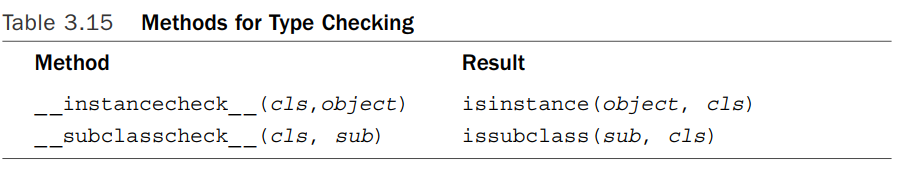


#### Attribute Access

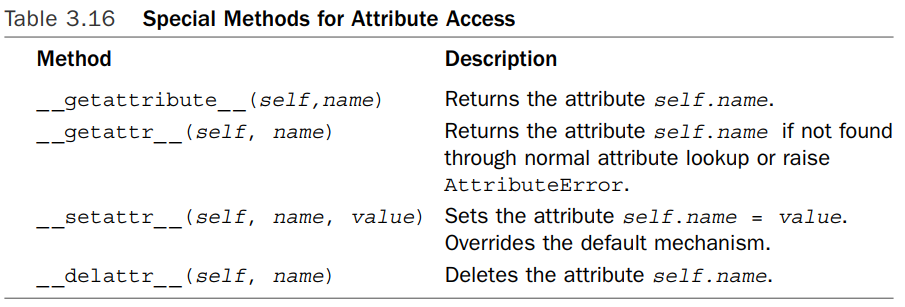

- Whenever an attribute is accessed, the `__getattribute__()` method is always invoked. If the attribute is located, it is returned. Otherwise, the `__getattr__()` method is invoked.The default behavior of `__getattr__()` is to raise an `AttributeError` exception.
- The `__setattr__()` method is always invoked when setting an attribute, and the `__delattr__()` method is always invoked when deleting an attribute.

#### Attribute Wrapping and Descriptors

- A subtle aspect of attribute manipulation is that **sometimes the attributes of an object are wrapped with an extra layer of logic that interact with the get, set, and delete operations described in 'Attribute Access' above**. This kind of wrapping is accomplished by creating a **descriptor** object that implements one or more of the methods in Table 3.17 below. Keep in mind that descriptions are optional and rarely need to be defined.

- Descriptors can only be instantiated at the class level. It is **not legal to create descriptors on a per-instance basis** by creating descriptor objects inside `__init__()` and other methods. Also, the **attribute name used by the class to hold a descriptor takes precedence** over attributes stored on instances.

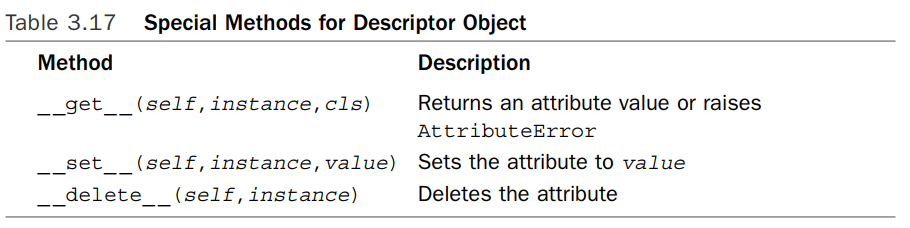

- The `__get__()`, `__set__()`, and `__delete__()` methods of a descriptor are meant to interact with the default implementation of `__getattribute__()`, `__setattr__()`, and `__delattr__()` methods on classes and types. This interaction occurs if you place an instance of a descriptor object in the body of a user-defined class. In this case, all access to the descriptor attribute will implicitly invoke the appropriate method on the descriptor object itself.
- Typically, descriptors are used to **implement the low-level functionality** of the object system including bound and unbound methods, class methods, static methods, and properties. So again it is rare, but if more details are needed, here is a flowchart from Bloomberg ENG Training 'Python Object-Oriented Programming'. See also the code block below this one for a simple example.

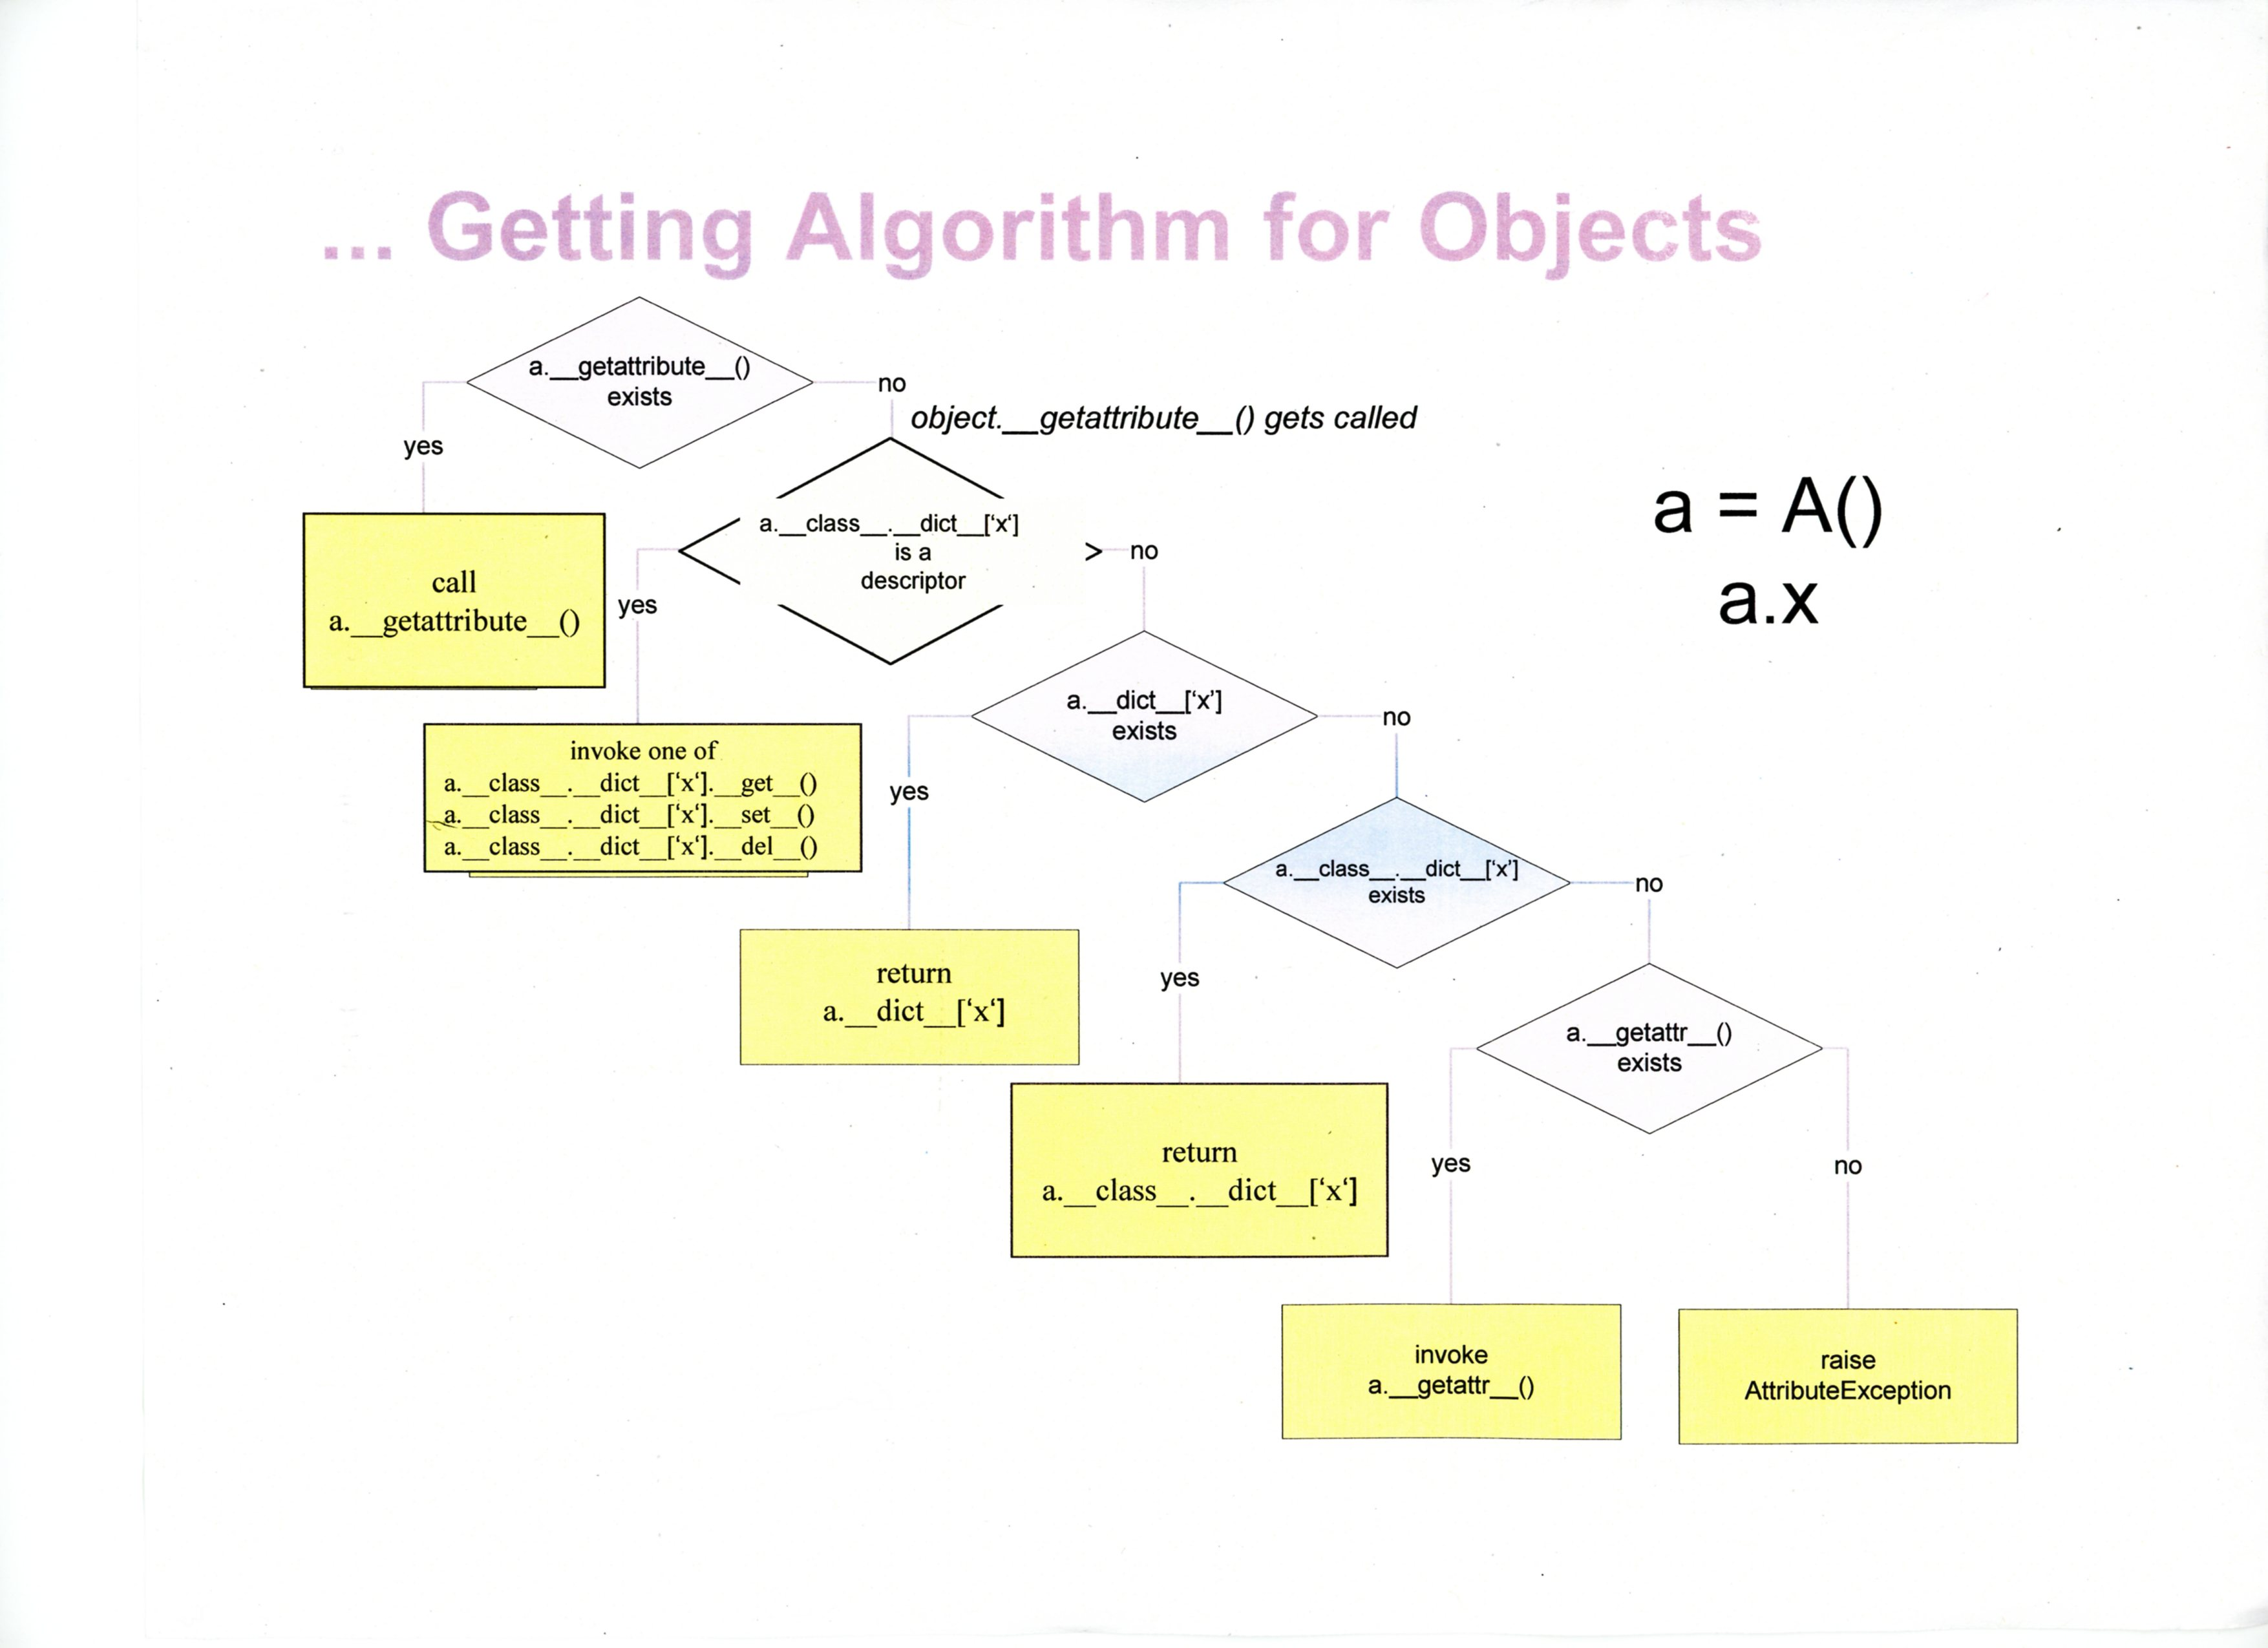

#### Sequence and Mapping Methods

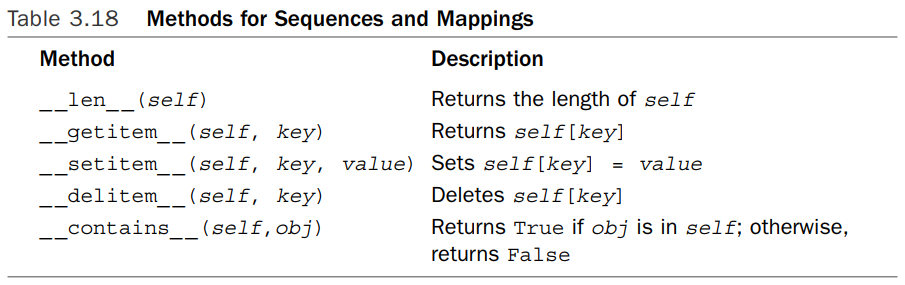

- The `__len__` method is called by the built-in `len()` function to return a nonnegative length.This function also determines truth values unless the `__bool__()` method has also been defined.
- The `__getitem__()` method can return an item by key value.
- The `__setitem__()` method assigns a value to an element.
- The `__delitem__()` method is invoked whenever the `del` operation is applied to a single element.
- The `__contains__()` method is used to implement the `in` operator.
- The slicing operations such as x = s[i:j] are also implemented using `__getitem__()`, `__setitem__()`, and `__delitem__()`. So we get slicing for free once we have the above magic method defined.

#### Iteration

- `__iter__()` and `__next__()`.
- The protocol states that when an iterator is passed to the `iter` built-in function, `iter` will return the iterator itself. In contrast, when a container type is passed to iter, a new iterator object will be returned each time; see Item 17 in [< Effective Python >](https://www.evernote.com/shard/s191/nl/21353936/80774c17-012b-c7d8-e425-a9b3eb0d55f3?title=Effective%20Python).

#### Mathematical Operations

- The special methods beginning with `r` support operations with **reversed operands**, such as `__radd__`, `__rsub__`. These are invoked only if the left operand doesn’t implement the specified operation. 
- The methods `__iadd__()`, `__isub__()`, and so forth are used to support in-place arithmetic operators such as `a+=b` and `a-=b` (also known as augmented assignment). A distinction is made between these operators and the standard arithmetic methods because the **implementation of the in-place operators might be able to provide certain customizations such as performance optimizations**. 
- The conversion methods `__int__()`, `__long__()`, `__float__()`, and `__complex__()` convert an object into one of the four built-in numerical types.
- A list of all maths operation magic methods can be found in Table 3.19 in [< Python Essential References >](https://www.evernote.com/shard/s191/nl/21353936/3a76bfd7-5b40-de76-dc58-c1805f99d416?title=Python%20Essential%20References).

#### Callable Interface

- An object can emulate a function by providing the `__call__(self [,*args [,**kwargs]])` method. Objects that emulate functions can be useful for creating functors or proxies; see an example of Item 17 of [< Effective Python >](https://www.evernote.com/shard/s191/nl/21353936/80774c17-012b-c7d8-e425-a9b3eb0d55f3?title=Effective%20Python).

#### Context Management Protocol

- The `__enter__()` method is invoked when the `with` statement executes.The value returned by this method is placed into the variable specified with the optional as `var` specifier. Note: `__enter__()` is only invoked when it is used in a context manager: simply initializing the object will not work.
- The `__exit__()` method is called as soon as control-flow leaves from the block of statements associated with the with statement. As arguments, `__exit__()` receives the current exception type, value, and traceback if an exception has been raised. If no errors are being handled, all three values are set to `None`. The `__exit__()` method returns `True` or `False` to indicate whether the raised exception was handled or not (if `False` is returned, any exceptions raised are propagated out of the context).
- See this [notebook](e-program-structure-control-flow-and-exception.ipynb) for discussion of context manager.

#### Object Inspection

- The `dir()` function is commonly used to inspect objects.An object can supply the list of names returned by dir() by implementing `__dir__(self)`.
- Defining this makes it easier to hide the internal details of objects that you don’t want a user to directly access. However, keep in mind that a user can still inspect the underlying `__dict__` attribute of instances and classes to see everything that is defined - we are all adults here.

#### Following block is an example of attribute access

In [ ]:
# How a class variable can control get, set and del access for instance variables

class Trace(object): # This is a descriptor object, which defines __get__, __set__ and __del__ (see Powerpoint)
    def __init__(self, attname):
        self.attname = attname
        
    def __get__(self, obj, obj_type): # Required signature: obj represents the specific instance of the class
        return obj.__dict__[self.attname]
    
    def __set__(self, obj, val):
        print('setter ' + str(self.attname) + str(val))
        obj.__dict__[self.attname] = val
        
    def __del__(self, obj):
        print('cannot delete')
        
class A(object):
    '''
    # Top of the flow chart. But defined in this way, a.att for ANY att is gonna return 100. 
    # So this is not really useful in most cases...
    def __getattribute__(self, attname):
        print attname
        return 100
        
    # Useful for caching: if something being accessed needs calculation, it may worth being populated in __dict__
    '''
    # With user-defined Trace(), this class variable x controls access for instance variable x, 
    # making use of the second step in the flow chart.
    x = Trace('test')
    def __init__(self):
        self.x = 42
        
a = A()

# a.x = 42 # Add variable is just adding to the internal dictionary.

print(a.x)
a.x = 100
print(a.x)
del a.x
print(a.x)

## References
- [< Python Essential References >](https://www.evernote.com/shard/s191/nl/21353936/3a76bfd7-5b40-de76-dc58-c1805f99d416?title=Python%20Essential%20References), Chapter 3, 7, 15.
- Bloomberg ENG Training 'Python Object-Oriented Programming'.